In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.shape

(54035, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [9]:
duplicates_mask = df.duplicated()
unique_df = df.drop_duplicates()

In [10]:
unique_df.shape

(53732, 9)

In [11]:
df['class'].value_counts()

1    29675
0    24360
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

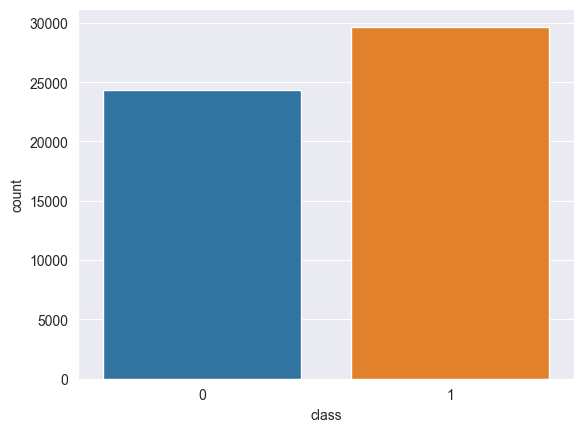

In [12]:
sns.countplot(data =df, x = 'class')

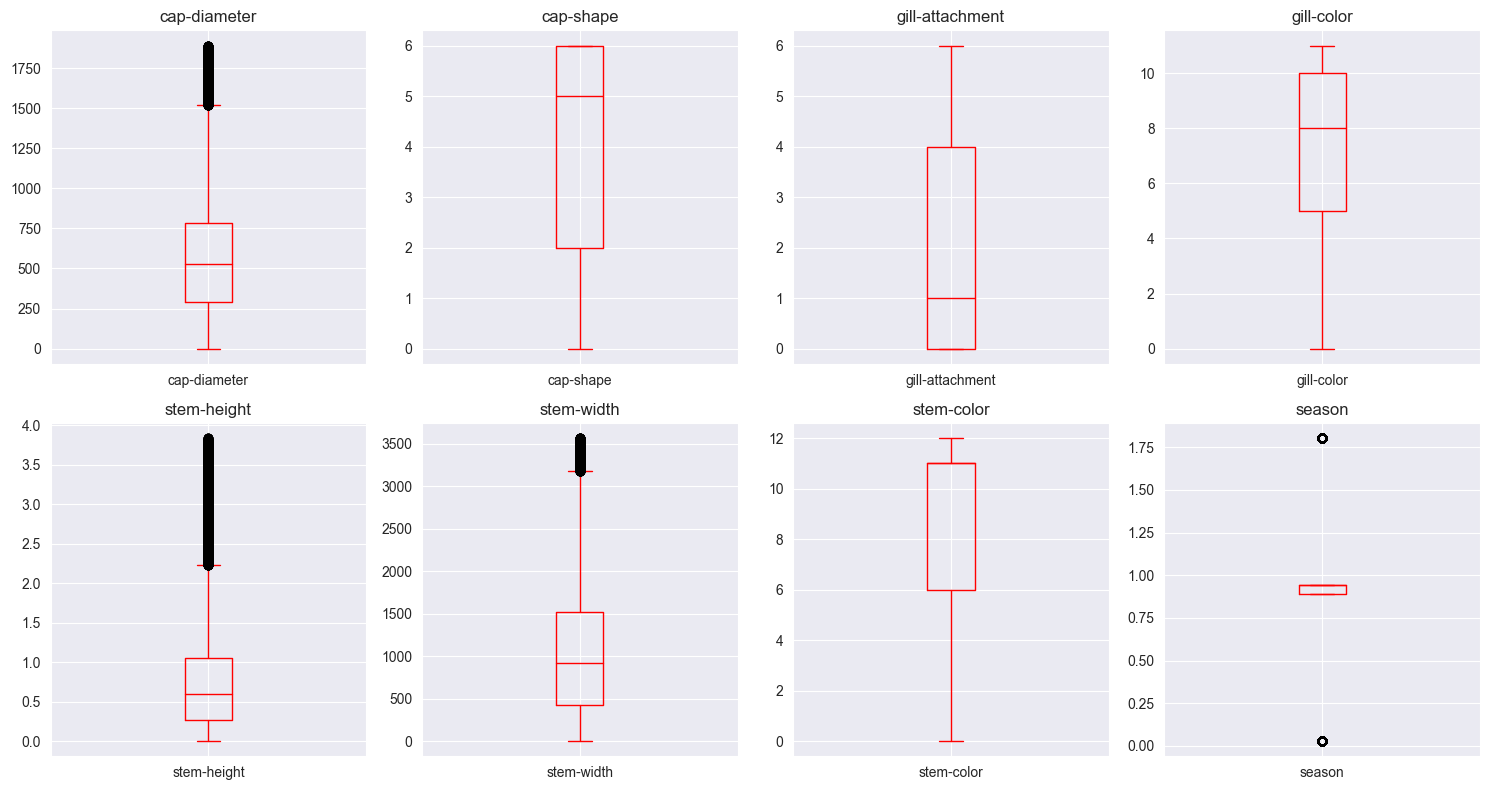

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()

columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']

for i, column in enumerate(columns):
    df.boxplot(column, ax=axs[i], color='Red')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

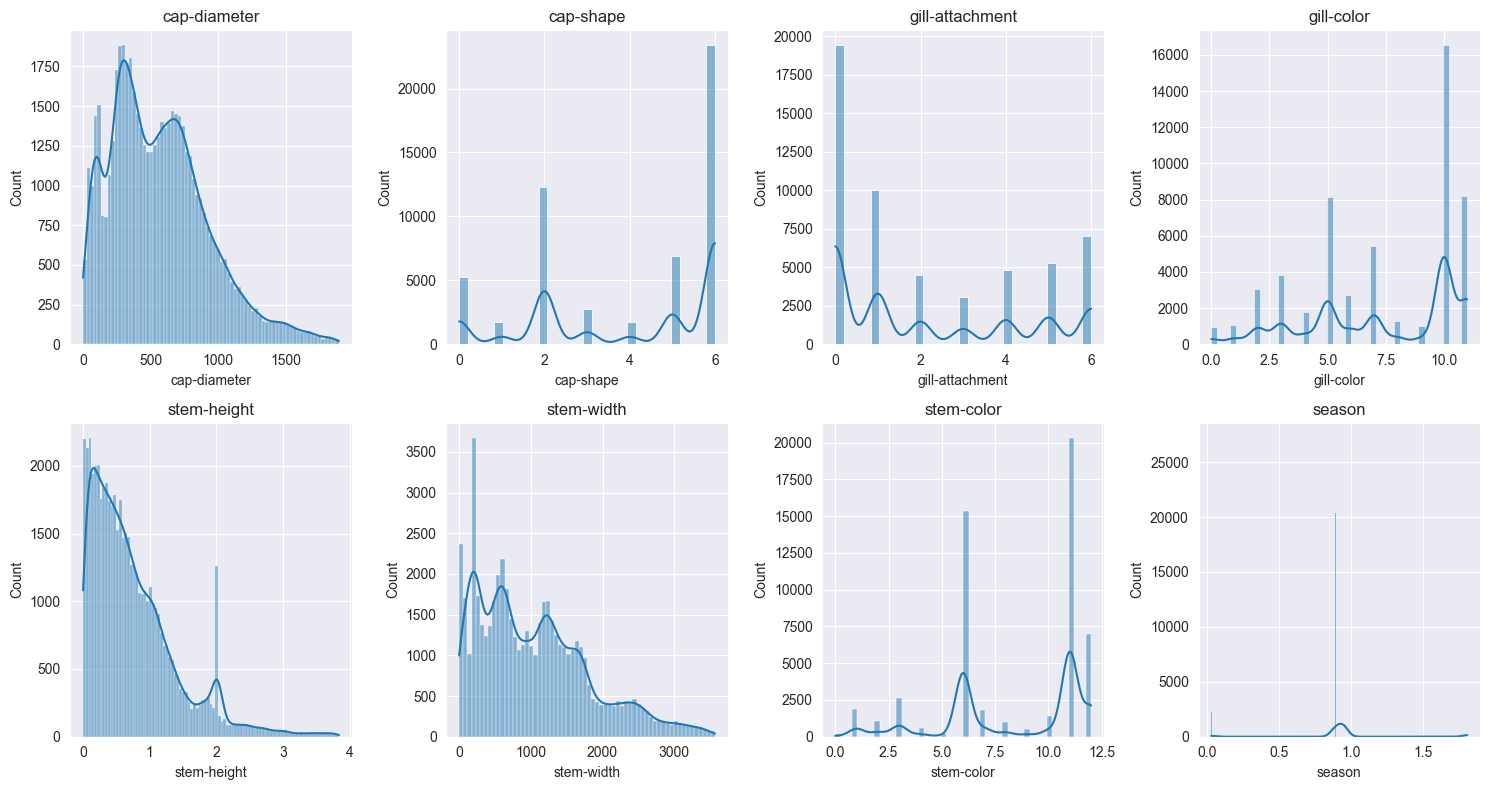

In [14]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], kde=True)
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

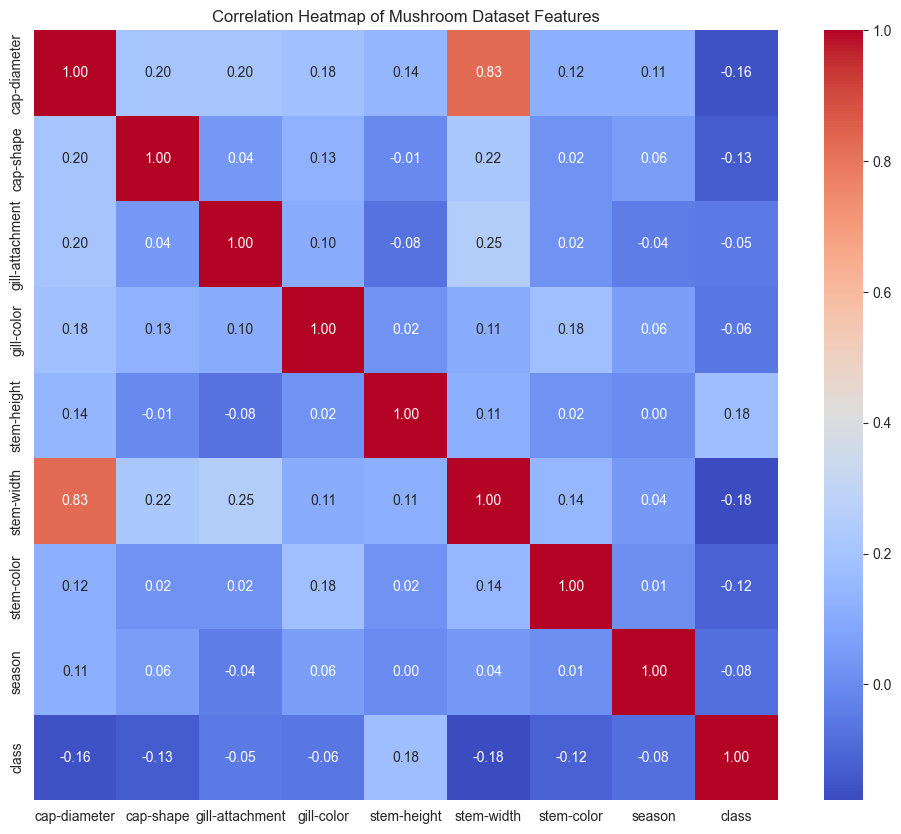

In [15]:
corr_matrix = unique_df .corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mushroom Dataset Features')
plt.show()

In [16]:
X = df.drop(columns=['class'])
Y = df['class']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
x_train.shape,x_test.shape

((43228, 8), (10807, 8))

In [19]:
y_train.shape,y_test.shape

((43228,), (10807,))

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
from sklearn.metrics import accuracy_score
accuracy = rf.score(x_test_scaled, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9903766077542334


In [22]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_scaled, y_train)
y_pred = xgb_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9890811511057648


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy on test set (SVM):", accuracy_svm)

Accuracy on test set (SVM): 0.9070972517812529
